In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('movielens.csv')

# Data Overview

In [3]:
df.head(10)

,Unnamed: 0,movieId,title,year,genres,userId,rating,timestamp
0,1,31,Dangerous Minds,1995.0,Drama,1,2.5,1260759144
1,2,1029,Dumbo,1941.0,Animation|Children|Drama|Musical,1,3.0,1260759179
2,3,1061,Sleepers,1996.0,Thriller,1,3.0,1260759182
3,4,1129,Escape from New York,1981.0,Action|Adventure|Sci-Fi|Thriller,1,2.0,1260759185
4,5,1172,Cinema Paradiso (Nuovo cinema Paradiso),1989.0,Drama,1,4.0,1260759205
5,6,1263,"Deer Hunter, The",1978.0,Drama|War,1,2.0,1260759151
6,7,1287,Ben-Hur,1959.0,Action|Adventure|Drama,1,2.0,1260759187
7,8,1293,Gandhi,1982.0,Drama,1,2.0,1260759148
8,9,1339,Dracula (Bram Stoker's Dracula),1992.0,Fantasy|Horror|Romance|Thriller,1,3.5,1260759125
9,10,1343,Cape Fear,1991.0,Thriller,1,2.0,1260759131


In [4]:
df.shape

(100004, 8)

In [5]:
df.columns

Index(['Unnamed: 0', 'movieId', 'title', 'year', 'genres', 'userId', 'rating',
       'timestamp'],
      dtype='object')

In [6]:
df.dtypes

Unnamed: 0      int64
movieId         int64
title          object
year          float64
genres         object
userId          int64
rating        float64
timestamp       int64
dtype: object

In [7]:
df.describe()

,Unnamed: 0,movieId,year,userId,rating,timestamp
count,100004.000000,100004.000000,99997.000000,100004.000000,100004.000000,1.000040e+05
mean,50002.500000,12548.664363,1991.827305,347.011310,3.543608,1.129639e+09
std,28868.812497,26369.198969,15.088703,195.163838,1.058064,1.916858e+08
min,1.000000,1.000000,1902.000000,1.000000,0.500000,7.896520e+08
25%,25001.750000,1028.000000,1987.000000,182.000000,3.000000,9.658478e+08
50%,50002.500000,2406.500000,1995.000000,367.000000,4.000000,1.110422e+09
75%,75003.250000,5418.000000,2001.000000,520.000000,4.000000,1.296192e+09
max,100004.000000,163949.000000,2016.000000,671.000000,5.000000,1.476641e+09


# Prepare the Data

In [8]:
df = df[[#'Unnamed: 0', 
    'movieId', 'title', 'year', 'genres', 'userId', 'rating'
    #, 'timestamp'
   ]].copy()

In [9]:
df

,movieId,title,year,genres,userId,rating
0,31,Dangerous Minds,1995.0,Drama,1,2.5
1,1029,Dumbo,1941.0,Animation|Children|Drama|Musical,1,3.0
2,1061,Sleepers,1996.0,Thriller,1,3.0
3,1129,Escape from New York,1981.0,Action|Adventure|Sci-Fi|Thriller,1,2.0
4,1172,Cinema Paradiso (Nuovo cinema Paradiso),1989.0,Drama,1,4.0
...,...,...,...,...,...,...
99999,6268,Raising Victor Vargas,2002.0,Comedy|Drama|Romance,671,2.5
100000,6269,Stevie,2002.0,Documentary,671,4.0
100001,6365,"Matrix Reloaded, The",2003.0,Action|Adventure|Sci-Fi|Thriller|IMAX,671,4.0
100002,6385,Whale Rider,2002.0,Drama,671,2.5


In [10]:
df.shape

(100004, 6)

In [11]:
df.dtypes

movieId      int64
title       object
year       float64
genres      object
userId       int64
rating     float64
dtype: object

In [12]:
df.isna().sum()

movieId    0
title      7
year       7
genres     0
userId     0
rating     0
dtype: int64

In [13]:
# Eliminate rows of records with null value
df.dropna(axis='index', how='any', subset=['title', 'year'], inplace=True)

In [14]:
df.isna().sum()

movieId    0
title      0
year       0
genres     0
userId     0
rating     0
dtype: int64

In [15]:
# See if there's any duplicate
df.loc[df.duplicated()]

,movieId,title,year,genres,userId,rating


In [16]:
#Convert 'year' column to integer
df['year'] = df['year'].astype('int64')

In [17]:
df.dtypes

movieId      int64
title       object
year         int64
genres      object
userId       int64
rating     float64
dtype: object

In [18]:
df

,movieId,title,year,genres,userId,rating
0,31,Dangerous Minds,1995,Drama,1,2.5
1,1029,Dumbo,1941,Animation|Children|Drama|Musical,1,3.0
2,1061,Sleepers,1996,Thriller,1,3.0
3,1129,Escape from New York,1981,Action|Adventure|Sci-Fi|Thriller,1,2.0
4,1172,Cinema Paradiso (Nuovo cinema Paradiso),1989,Drama,1,4.0
...,...,...,...,...,...,...
99999,6268,Raising Victor Vargas,2002,Comedy|Drama|Romance,671,2.5
100000,6269,Stevie,2002,Documentary,671,4.0
100001,6365,"Matrix Reloaded, The",2003,Action|Adventure|Sci-Fi|Thriller|IMAX,671,4.0
100002,6385,Whale Rider,2002,Drama,671,2.5


# Find Out the Top Rated Genre Keyword

In [19]:
# To find out rating for each genre keyword, we have to split them in the column
df['genres'] = df['genres'].str.split(pat='|')

In [20]:
df

,movieId,title,year,genres,userId,rating
0,31,Dangerous Minds,1995,[Drama],1,2.5
1,1029,Dumbo,1941,"[Animation, Children, Drama, Musical]",1,3.0
2,1061,Sleepers,1996,[Thriller],1,3.0
3,1129,Escape from New York,1981,"[Action, Adventure, Sci-Fi, Thriller]",1,2.0
4,1172,Cinema Paradiso (Nuovo cinema Paradiso),1989,[Drama],1,4.0
...,...,...,...,...,...,...
99999,6268,Raising Victor Vargas,2002,"[Comedy, Drama, Romance]",671,2.5
100000,6269,Stevie,2002,[Documentary],671,4.0
100001,6365,"Matrix Reloaded, The",2003,"[Action, Adventure, Sci-Fi, Thriller, IMAX]",671,4.0
100002,6385,Whale Rider,2002,[Drama],671,2.5


In [21]:
# Explode the 'genres' column to make every keyword have a rating
df = df.explode('genres')
df.head(20)

,movieId,title,year,genres,userId,rating
0,31,Dangerous Minds,1995,Drama,1,2.5
1,1029,Dumbo,1941,Animation,1,3.0
1,1029,Dumbo,1941,Children,1,3.0
1,1029,Dumbo,1941,Drama,1,3.0
1,1029,Dumbo,1941,Musical,1,3.0
2,1061,Sleepers,1996,Thriller,1,3.0
3,1129,Escape from New York,1981,Action,1,2.0
3,1129,Escape from New York,1981,Adventure,1,2.0
3,1129,Escape from New York,1981,Sci-Fi,1,2.0
3,1129,Escape from New York,1981,Thriller,1,2.0


In [22]:
# Notice there's a keyword named '(no genres listed)', we want to get rid of it
df['genres'].value_counts()

Drama                 44751
Comedy                38022
Action                27056
Thriller              25240
Adventure             22017
Romance               19336
Crime                 16266
Sci-Fi                15365
Fantasy               10657
Children               8680
Mystery                7625
Horror                 6790
Animation              6170
War                    5025
Musical                4722
IMAX                   3156
Western                1912
Documentary            1564
Film-Noir              1140
(no genres listed)       16
Name: genres, dtype: int64

In [23]:
filt = df['genres']=='(no genres listed)'
df.loc[filt]

,movieId,title,year,genres,userId,rating
8762,128620,Victoria,2015,(no genres listed),56,5.0
8781,160590,Survive and Advance,2013,(no genres listed),56,5.0
11812,141866,Green Room,2015,(no genres listed),73,4.0
27677,136592,Freaky Friday,1995,(no genres listed),200,1.5
39521,117192,Doctor Who: The Time of the Doctor,2013,(no genres listed),287,5.0
41926,83829,Scorpio Rising,1964,(no genres listed),299,4.5
45613,149532,Marco Polo: One Hundred Eyes,2015,(no genres listed),324,3.0
50521,122888,Ben-hur,2016,(no genres listed),371,5.0
55788,117192,Doctor Who: The Time of the Doctor,2013,(no genres listed),402,4.5
63684,126106,Beastie Boys: Sabotage,1994,(no genres listed),457,3.5


In [24]:
df.drop(df.loc[filt].index, inplace=True)

In [25]:
# Now, '(no genres listed)' is gone
df['genres'].value_counts()

Drama          44751
Comedy         38022
Action         27056
Thriller       25240
Adventure      22017
Romance        19336
Crime          16266
Sci-Fi         15365
Fantasy        10657
Children        8680
Mystery         7625
Horror          6790
Animation       6170
War             5025
Musical         4722
IMAX            3156
Western         1912
Documentary     1564
Film-Noir       1140
Name: genres, dtype: int64

In [26]:
# Average rating of each keyword 
average_ratings = df.groupby('genres')['rating'].mean()
average_ratings.sort_values(ascending=False)

genres
Film-Noir      3.955702
War            3.817214
Documentary    3.813299
Drama          3.681761
Crime          3.679639
Mystery        3.679541
Animation      3.636062
Musical        3.598793
IMAX           3.571134
Western        3.566423
Romance        3.556165
Adventure      3.520393
Thriller       3.518502
Fantasy        3.518063
Children       3.466187
Sci-Fi         3.460430
Comedy         3.445992
Action         3.445613
Horror         3.315243
Name: rating, dtype: float64

In [27]:
# Put them in ascending order for the horizontal bar chart
top_keyword = average_ratings.sort_values(ascending=True)
top_keyword

genres
Horror         3.315243
Action         3.445613
Comedy         3.445992
Sci-Fi         3.460430
Children       3.466187
Fantasy        3.518063
Thriller       3.518502
Adventure      3.520393
Romance        3.556165
Western        3.566423
IMAX           3.571134
Musical        3.598793
Animation      3.636062
Mystery        3.679541
Crime          3.679639
Drama          3.681761
Documentary    3.813299
War            3.817214
Film-Noir      3.955702
Name: rating, dtype: float64

Text(0, 0.5, 'Genre Keyword')

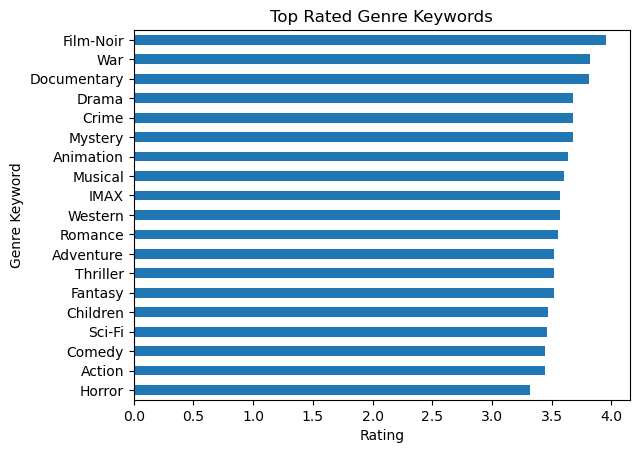

In [28]:
ax = top_keyword.plot(kind='barh', title='Top Rated Genre Keywords')
ax.set_xlabel('Rating')
ax.set_ylabel('Genre Keyword')